# K-Means Clustering

The [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) is a "go-to" place for fascinating data sets often used in machine learning education and research.  

Let's check out the Stone Flakes data set.  Find and download the [StoneFlakes.dat](http://archive.ics.uci.edu/ml/machine-learning-databases/00299/StoneFlakes.dat) file by clicking here or by running *wget* like below.

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00299/StoneFlakes.dat

--2017-04-17 07:45:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/00299/StoneFlakes.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3523 (3.4K) [text/plain]
Saving to: ‘StoneFlakes.dat’

StoneFlakes.dat     100%[===================>]   3.44K  --.-KB/s    in 0s      

2017-04-17 07:45:02 (140 MB/s) - ‘StoneFlakes.dat’ saved [3523/3523]



Let's look at the first few lines.

In [2]:
!head StoneFlakes.dat

Read about the column names and the meaning of the ID values at the data set's web site.  

Notice that values are separated by commas, except for the first column.  Also notice that there are question marks where data is missing.  How can we read this?  Well, the usual answer is to "google" for the answer.  Try seaching for "read data set numpy"

numpy includes functions for reading csv files.  However, the [pandas package](http://pandas.pydata.org/) offers more powerful functions for parsing data.  Let's try its *read_csv* function.

In [3]:
import pandas

In [4]:
d = pandas.read_csv(open('StoneFlakes.dat'))

In [5]:
d[:5]

,,,,,,,ID LBI RTI WDI FLA PSF FSF ZDF1 PROZD
ar ?,35.3,2.60,?,42.4,24.2,47.1,69
arn 1.23,27.0,3.59,122,0.0,40.0,40.0,30
be 1.24,26.5,2.90,121,16.0,20.7,29.7,72
bi1 1.07,29.1,3.10,114,44.0,2.6,26.3,68
bi2 1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [6]:
d = pandas.read_csv(open('StoneFlakes.dat'),sep=',')
d[:5]

,,,,,,,ID LBI RTI WDI FLA PSF FSF ZDF1 PROZD
ar ?,35.3,2.60,?,42.4,24.2,47.1,69
arn 1.23,27.0,3.59,122,0.0,40.0,40.0,30
be 1.24,26.5,2.90,121,16.0,20.7,29.7,72
bi1 1.07,29.1,3.10,114,44.0,2.6,26.3,68
bi2 1.08,43.7,2.40,105,32.6,5.8,10.7,42


Let's just replace commas with spaces, using unix.  Read about the *tr* unix command at [Linux TR Command Examples](http://www.thegeekstuff.com/2012/12/linux-tr-command/)

In [7]:
! tr -s ' ' ',' < StoneFlakes.dat > StoneFlakes2.dat
! head StoneFlakes2.dat

In [8]:
d = pandas.read_csv(open('StoneFlakes2.dat'))
d[:5]

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar,?,35.3,2.60,?,42.4,24.2,47.1,69
1,arn,1.23,27.0,3.59,122,0.0,40.0,40.0,30
2,be,1.24,26.5,2.90,121,16.0,20.7,29.7,72
3,bi1,1.07,29.1,3.10,114,44.0,2.6,26.3,68
4,bi2,1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [9]:
d = pandas.read_csv(open('StoneFlakes2.dat'),na_values='?')
d[:5]

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar,NaN,35.3,2.60,NaN,42.4,24.2,47.1,69
1,arn,1.23,27.0,3.59,122.0,0.0,40.0,40.0,30
2,be,1.24,26.5,2.90,121.0,16.0,20.7,29.7,72
3,bi1,1.07,29.1,3.10,114.0,44.0,2.6,26.3,68
4,bi2,1.08,43.7,2.40,105.0,32.6,5.8,10.7,42


In [10]:
d = pandas.read_csv(open('StoneFlakes2.dat'),na_values='?',error_bad_lines=False)
d[:5]

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar,NaN,35.3,2.60,NaN,42.4,24.2,47.1,69
1,arn,1.23,27.0,3.59,122.0,0.0,40.0,40.0,30
2,be,1.24,26.5,2.90,121.0,16.0,20.7,29.7,72
3,bi1,1.07,29.1,3.10,114.0,44.0,2.6,26.3,68
4,bi2,1.08,43.7,2.40,105.0,32.6,5.8,10.7,42


In [11]:
d[:5].isnull()

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [12]:
d[:5].isnull().any(axis=1)

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
d[:5].isnull().any(axis=1) == False

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [14]:
print(d.shape)
d = d[d.isnull().any(axis=1)==False]
print(d.shape)

(79, 9)
(73, 9)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = d.iloc[:,1:].values
data.shape

(73, 8)

In [17]:
data[:5,:]

array([[   1.23,   27.  ,    3.59,  122.  ,    0.  ,   40.  ,   40.  ,
          30.  ],
       [   1.24,   26.5 ,    2.9 ,  121.  ,   16.  ,   20.7 ,   29.7 ,
          72.  ],
       [   1.07,   29.1 ,    3.1 ,  114.  ,   44.  ,    2.6 ,   26.3 ,
          68.  ],
       [   1.08,   43.7 ,    2.4 ,  105.  ,   32.6 ,    5.8 ,   10.7 ,
          42.  ],
       [   1.39,   29.5 ,    2.78,  126.  ,   14.  ,    0.  ,   50.  ,
          78.  ]])

To see this data, let's try plotting each column as a separate curve on the same axes.

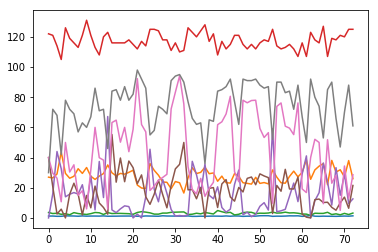

In [18]:
plt.plot(data);

Each sample has 8 attribues, so each sample is a point in 8-dimensional space.  I wonder how well the samples "clump" in those 8 dimensions.  Let's try clustering them with the *k-means* algorithm.

First, let's try to find two clusters, so $k=2$.  We must initialize the two means of the two clusters.  Let's just pick two samples at random.

In [19]:
np.random.choice(range(data.shape[0]),2, replace=False) # data.shape[0] is number of rows, or samples

array([50, 23])

In [20]:
np.random.choice(range(data.shape[0]),2, replace=False)

array([13, 53])

In [21]:
centersIndex = np.random.choice(range(data.shape[0]),2, replace=False)
centersIndex

array([22, 33])

In [22]:
centers = data[centersIndex,:]
centers

array([[   1.07,   19.8 ,    4.15,  117.  ,    0.  ,   28.5 ,   61.9 ,
          92.  ],
       [   1.31,   26.5 ,    2.28,  126.  ,    2.1 ,   18.6 ,   34.  ,
          77.  ]])

Now we must find all samples that are closest to the first center, and those that are closest to the second sample.

Check out the wonders of numpy broadcasting.

In [23]:
a = np.array([1,2,3])
b = np.array([10,20,30])
a, b

(array([1, 2, 3]), array([10, 20, 30]))

In [24]:
a-b

array([ -9, -18, -27])

But what if we want to subtract every element of a with every element of b?

In [25]:
np.resize(a,(3,3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [26]:
np.resize(b, (3,3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [27]:
np.resize(a,(3,3)).T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [28]:
np.resize(a,(3,3)).T - np.resize(b,(3,3))

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

However, we can ask numpy to do this duplication for us if we reshape a to be a column vector and leave b as a row vector.

$$ \begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30
\end{pmatrix}
\;\; = \;\;
\begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 2\\
3 & 3 & 3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30\\
10 & 20 & 30\\
10 & 20 & 30
\end{pmatrix}
$$

In [29]:
a[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [30]:
a.reshape((-1,1))

array([[1],
       [2],
       [3]])

In [31]:
a.shape, a[:,np.newaxis].shape

((3,), (3, 1))

In [32]:
a[:,np.newaxis] - b

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

In [33]:
a = np.array([1,2,3])
b = np.array([[10,20,30],[40,50,60]])
print(a)
print(b)

[1 2 3]
[[10 20 30]
 [40 50 60]]


In [34]:
b-a

array([[ 9, 18, 27],
       [39, 48, 57]])

The single row vector a is duplicated for as many rows as there are in b!  We can use this to calculate the squared distance between a center and every sample.

In [35]:
centers[0,:]

array([   1.07,   19.8 ,    4.15,  117.  ,    0.  ,   28.5 ,   61.9 ,   92.  ])

In [36]:
np.sum((centers[0,:] - data)**2, axis=1)

array([  4533.0392,   1816.1614,   4546.7625,   7417.7626,   1522.9293,
         1853.0901,   1616.6825,   4016.9441,   4067.1089,   4774.4106,
         2869.298 ,    171.2814,   2813.7094,   1710.4201,  10714.3412,
          916.5974,    160.6406,    590.765 ,    200.0881,    771.9049,
          279.5969,   1029.3541,      0.    ,    475.51  ,   6056.283 ,
         3542.6969,   1936.3241,   2469.2781,   2375.3086,    223.8414,
          499.0321,   1158.7321,    702.3124,   1235.2745,   4257.7686,
         4185.8634,   2609.3389,   7800.2426,   2913.819 ,   2610.1594,
         1056.7546,    198.265 ,    135.9154,    611.585 ,   2113.164 ,
         3488.5437,    407.9841,    262.8289,    267.3774,    384.4646,
           94.2037,    227.9418,     93.1409,   8692.9362,    275.5625,
          385.1974,    154.775 ,    427.7186,   1216.0654,    495.3449,
         4088.4934,   6727.3925,   1368.0845,    785.0674,   1213.0726,
         6300.8706,   1145.3358,   2394.2104,   3583.6034,   599

In [37]:
np.sum((centers[1,:] - data)**2, axis=1) > np.sum((centers[0,:] - data)**2, axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False, False], dtype=bool)

In [38]:
centers

array([[   1.07,   19.8 ,    4.15,  117.  ,    0.  ,   28.5 ,   61.9 ,
          92.  ],
       [   1.31,   26.5 ,    2.28,  126.  ,    2.1 ,   18.6 ,   34.  ,
          77.  ]])

In [39]:
centers[:,np.newaxis,:].shape, data.shape

((2, 1, 8), (73, 8))

In [40]:
(centers[:,np.newaxis,:] - data).shape

(2, 73, 8)

In [41]:
np.sum((centers[:,np.newaxis,:] - data)**2, axis=2).shape

(2, 73)

In [42]:
np.argmin(np.sum((centers[:,np.newaxis,:] - data)**2, axis=2), axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [43]:
cluster = np.argmin(np.sum((centers[:,np.newaxis,:] - data)**2, axis=2), axis=0)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [44]:
data[cluster==0,:].mean(axis=0)

array([   1.216     ,   24.353     ,    3.484     ,  113.6       ,
          6.22666667,   25.82333333,   68.19666667,   88.1       ])

In [45]:
data[cluster==1,:].mean(axis=0)

array([   1.20209302,   30.66046512,    2.80488372,  120.04651163,
         22.83023256,   12.58604651,   26.33953488,   65.27906977])

In [46]:
k = 2
for i in range(k):
    centers[i,:] = data[cluster==i,:].mean(axis=0)

In [47]:
centers

array([[   1.216     ,   24.353     ,    3.484     ,  113.6       ,
           6.22666667,   25.82333333,   68.19666667,   88.1       ],
       [   1.20209302,   30.66046512,    2.80488372,  120.04651163,
          22.83023256,   12.58604651,   26.33953488,   65.27906977]])

In [48]:
def kmeans(data, k = 2, n = 5):
    # Initial centers
    centers = data[np.random.choice(range(data.shape[0]),k, replace=False), :]
    # Repeat n times
    for iteration in range(n):
        # Which center is each sample closest to?
        closest = np.argmin(np.sum((centers[:,np.newaxis,:] - data)**2, axis=2), axis=0)
        # Update cluster centers
        for i in range(k):
            centers[i,:] = data[closest==i,:].mean(axis=0)
    return centers

In [49]:
kmeans(data,2)

array([[   1.18432432,   30.7027027 ,    2.8072973 ,  120.24324324,
          24.56756757,   12.42432432,   22.74054054,   63.05405405],
       [   1.23194444,   25.36083333,    3.36833333,  114.47222222,
           7.20833333,   23.78333333,   64.91944444,   86.58333333]])

In [50]:
kmeans(data,2)

array([[   1.23194444,   25.36083333,    3.36833333,  114.47222222,
           7.20833333,   23.78333333,   64.91944444,   86.58333333],
       [   1.18432432,   30.7027027 ,    2.8072973 ,  120.24324324,
          24.56756757,   12.42432432,   22.74054054,   63.05405405]])

Let's define $J$ from the book, which is a performance measure being minimized by *k-means*. It is defined on page 424 as
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{\mu}_k||^2
$$
where $N$ is the number of samples, $K$ is the number of cluster centers, $\mathbf{x}_n$ is the $n^{th}$ sample and $\mathbf{\mu}_k$ is the $k^{th}$ center, each being an element of $\mathbf{R}^p$ where $p$ is the dimensionality of the data.

The sums can be computed using python *for* loops, but *for* loops are much slower than matrix operations in python, as the following cells show.

In [51]:
a = np.linspace(0,10,30).reshape(3,10)
a

array([[  0.        ,   0.34482759,   0.68965517,   1.03448276,
          1.37931034,   1.72413793,   2.06896552,   2.4137931 ,
          2.75862069,   3.10344828],
       [  3.44827586,   3.79310345,   4.13793103,   4.48275862,
          4.82758621,   5.17241379,   5.51724138,   5.86206897,
          6.20689655,   6.55172414],
       [  6.89655172,   7.24137931,   7.5862069 ,   7.93103448,
          8.27586207,   8.62068966,   8.96551724,   9.31034483,
          9.65517241,  10.        ]])

In [52]:
b = np.arange(30).reshape(3,10)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [53]:
result = np.zeros((3,10))
for i in range(3):
    for j in range(10):
        result[i,j] = a[i,j] + b[i,j]
result

array([[  0.        ,   1.34482759,   2.68965517,   4.03448276,
          5.37931034,   6.72413793,   8.06896552,   9.4137931 ,
         10.75862069,  12.10344828],
       [ 13.44827586,  14.79310345,  16.13793103,  17.48275862,
         18.82758621,  20.17241379,  21.51724138,  22.86206897,
         24.20689655,  25.55172414],
       [ 26.89655172,  28.24137931,  29.5862069 ,  30.93103448,
         32.27586207,  33.62068966,  34.96551724,  36.31034483,
         37.65517241,  39.        ]])

In [54]:
%%timeit
result = np.zeros((3,10))
for i in range(3):
    for j in range(10):
        result[i,j] = a[i,j] + b[i,j]

10000 loops, best of 3: 50.6 µs per loop


In [55]:
result = a + b
result

array([[  0.        ,   1.34482759,   2.68965517,   4.03448276,
          5.37931034,   6.72413793,   8.06896552,   9.4137931 ,
         10.75862069,  12.10344828],
       [ 13.44827586,  14.79310345,  16.13793103,  17.48275862,
         18.82758621,  20.17241379,  21.51724138,  22.86206897,
         24.20689655,  25.55172414],
       [ 26.89655172,  28.24137931,  29.5862069 ,  30.93103448,
         32.27586207,  33.62068966,  34.96551724,  36.31034483,
         37.65517241,  39.        ]])

In [56]:
%%timeit
result = a + b

The slowest run took 15.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.6 µs per loop


So, the matrix form is 10 times faster!

Now, back to our problem.  How can we use matrix operations to calculate the squared distance between two centers and, say, five data samples?  Let's say both are two-dimensional.

In [57]:
centers = np.array([[1,2],[5,4]])
centers

array([[1, 2],
       [5, 4]])

In [58]:
data = np.array([[3,2],[4,6],[7,3],[4,6],[1,8]])
data

array([[3, 2],
       [4, 6],
       [7, 3],
       [4, 6],
       [1, 8]])

This will be a little weird, and hard to understand, but by adding an empty dimension to the *centers* array, numpy broadcasting does all the work for us. 

In [59]:
centers[:,np.newaxis,:]

array([[[1, 2]],

       [[5, 4]]])

In [60]:
centers[:,np.newaxis,:].shape

(2, 1, 2)

In [61]:
data.shape

(5, 2)

In [62]:
diffsq = (centers[:,np.newaxis,:] - data)**2
diffsq

array([[[ 4,  0],
        [ 9, 16],
        [36,  1],
        [ 9, 16],
        [ 0, 36]],

       [[ 4,  4],
        [ 1,  4],
        [ 4,  1],
        [ 1,  4],
        [16, 16]]])

In [63]:
diffsq.shape

(2, 5, 2)

In [64]:
np.sum(diffsq,axis=2)

array([[ 4, 25, 37, 25, 36],
       [ 8,  5,  5,  5, 32]])

Now we have a 2 x 5 array with the first row containing the squared distance from the first center to each of the five data samples, and the second row containing the squared distances from the second center to each of the five data samples.

Now we just have to find the smallest distance in each column and sum them up.

In [65]:
np.min(np.sum(diffsq,axis=2), axis=0)

array([ 4,  5,  5,  5, 32])

In [66]:
np.sum(np.min(np.sum(diffsq,axis=2), axis=0))

51

Let's define a function named *calcJ* to do this calculation.

In [7]:
def calcJ(data,centers):
    diffsq = (centers[:,np.newaxis,:] - data)**2
    return np.sum(np.min(np.sum(diffsq,axis=2), axis=0))

In [68]:
calcJ(data,centers)

51

In [1]:
def kmeans(data, k = 2, n = 5):
    # Initialize centers and list J to track performance metric
    centers = data[np.random.choice(range(data.shape[0]),k,replace=False), :]
    J = []
    
    # Repeat n times
    for iteration in range(n):
        
        # Which center is each sample closest to?
        sqdistances = np.sum((centers[:,np.newaxis,:] - data)**2, axis=2)
        closest = np.argmin(sqdistances, axis=0)
        
        # Calculate J and append to list J
        J.append(calcJ(data,centers))
        
        # Update cluster centers
        for i in range(k):
            centers[i,:] = data[closest==i,:].mean(axis=0)
            
    # Calculate J one final time and return results
    J.append(calcJ(data,centers))
    return centers,J,closest

In [70]:
centers,J,closest = kmeans(data,2)

In [71]:
J

[30, 19, 19, 19, 19, 19]

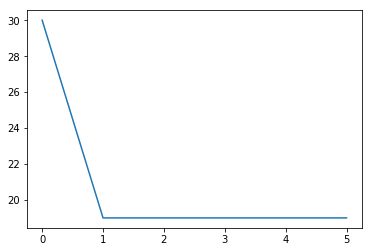

In [72]:
plt.plot(J);

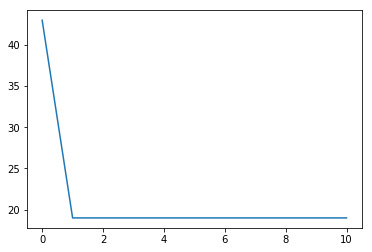

In [73]:
centers,J,closest = kmeans(data,2,10)
plt.plot(J);

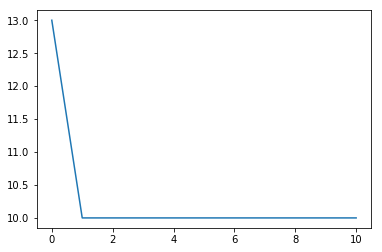

In [74]:
centers,J,closest = kmeans(data,3,10)
plt.plot(J);

In [75]:
small = np.array([[8,7],[7,6.6],[9.2,8.3],[6.8,9.2], [1.2,3.2],[4.8,2.3],[3.4,3.2],[3.2,5.6],[1,4],[2,2.2]])

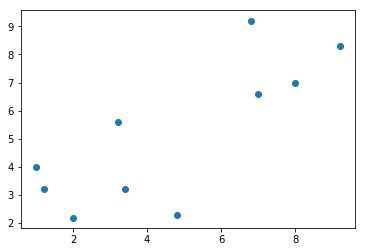

In [76]:
plt.scatter(small[:,0],small[:,1]);

In [85]:
c,J,closest = kmeans(small,2,n=2)

In [78]:
c

array([[ 7.75      ,  7.775     ],
       [ 2.6       ,  3.41666667]])

In [79]:
closest

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

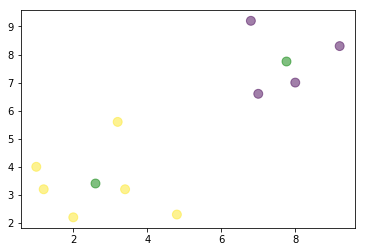

In [80]:
plt.scatter(small[:,0], small[:,1], s=80, c=closest, alpha=0.5);
plt.scatter(c[:,0],c[:,1],s=80,c="green",alpha=0.5);

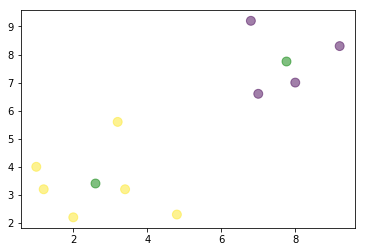

In [81]:
c,J,closest = kmeans(small,2,n=2)
plt.scatter(small[:,0], small[:,1], s=80, c=closest, alpha=0.5);
plt.scatter(c[:,0],c[:,1],s=80,c="green",alpha=0.5);

In [82]:
J

[70.859999999999985, 26.565833333333334, 26.565833333333334]

In [5]:
import gzip
import pickle

with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    # zero = train_set[0][1,:].reshape((28,28,1))
    # one = train_set[0][3,:].reshape((28,28,1))
    # two = train_set[0][5,:].reshape((28,28,1))
    # four = train_set[0][20,:].reshape((28,28,1))

X = train_set[0]
T = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

X.shape, T.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

In [8]:
c,J,closest = kmeans(X, k=10, n=20)

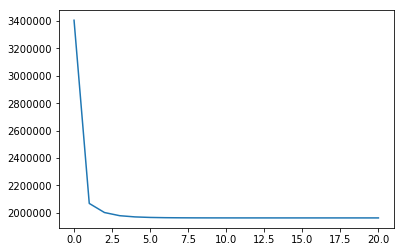

In [10]:
plt.plot(J)

In [11]:
c.shape

(10, 784)

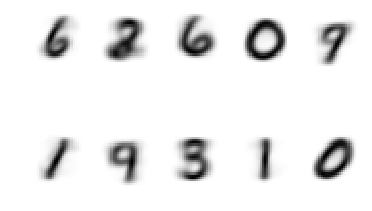

In [12]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(-c[i,:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

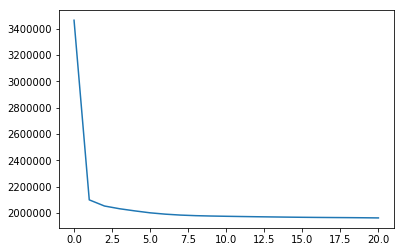

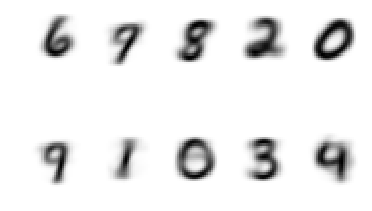

In [16]:
c,J,closest = kmeans(X, k=10, n=20)
plt.plot(J)
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(-c[i,:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

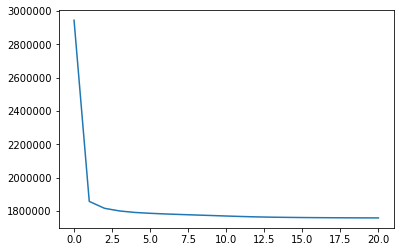

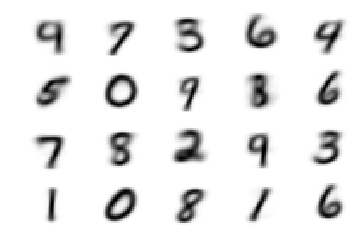

In [15]:
c,J,closest = kmeans(X, k=20, n=20)
plt.plot(J)
plt.figure()
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(-c[i,:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')